In [42]:
import sys
sys.path.append('../src/')

from log_euclidean_mechanism import LogEuclideanGaussianMechanismOnSPD
from extrinsic_mechanism import ExtrinsicApproach
from laplacian_mechanism import LaplacianOnSPD
from generate_synthetic_data import generate_syn_data
from math import sqrt
from geomstats.geometry.spd_matrices import SPDMatrices
import numpy as np
from tqdm import tqdm
from timeit import default_timer as timer


from math import sqrt, exp, log 

In [43]:
def compute_frechet_mean(data_points):
    frechet_mean = SPDMatrices.expm(SPDMatrices.logm(data_points).mean(axis=0))
    return frechet_mean

In [44]:
k_list = [2, 5, 10, 15, 20, 25, 30]
#k_list = [30]
radius_eig_val = 1/4
n = 500
log_sensitivity_list = [(2* (sqrt(k) * radius_eig_val))/n for k in k_list ]
ext_sensitivity_list = [ 2* exp((sqrt(k) * radius_eig_val) - 1) /n for k in k_list]
data_list = []
for k in k_list:
    samples = []
    for i in range(n):
        samples.append(generate_syn_data(k))
    samples = np.stack(samples)
    print(samples.shape)
    data_list.append(samples)

(500, 2, 2)
(500, 5, 5)
(500, 10, 10)
(500, 15, 15)
(500, 20, 20)
(500, 25, 25)
(500, 30, 30)


In [45]:
eps_list = [0.1, 0.2, 0.3, 0.4]
log_data_mean = []
log_data_std = []

ext_data_mean = []
ext_data_std = []

delta = 1e-6
for eps in tqdm(eps_list):
    log_dist_k_mean = []
    log_dist_k_std = []

    ext_dist_k_mean = []
    ext_dist_k_std = []
    for i in range(len(k_list)):
        l = LogEuclideanGaussianMechanismOnSPD(k_list[i], 'calibrated_analytic')
        e = ExtrinsicApproach(k=k_list[i], sigma_type='calibrated_analytic')
        fm = compute_frechet_mean(data_list[i])

  

        log_dist_i = []
        ext_dist_i = []


        for _ in range(10):
            log_curr, _ = l.privatize(fm, log_sensitivity_list[i], eps, delta)
            ext_curr, ext_e_dist = e.privatize(fm, ext_sensitivity_list[i], epsilon=eps, delta=delta)
            log_e_dist = np.linalg.norm(e.vecd(log_curr)-e.vecd(fm))
            ext_e_dist = np.linalg.norm(e.vecd(ext_curr)-e.vecd(fm))
            log_dist_i.append(log_e_dist)
            ext_dist_i.append(ext_e_dist)
          

        log_dist_mean = np.array(log_dist_i).mean()
        log_dist_std = np.array(log_dist_i).std()

        ext_dist_mean = np.array(ext_dist_i).mean()
        ext_dist_std = np.array(ext_dist_i).std()
        print("a", ext_dist_mean)
        #print("ext", ext_dist_i, ext_dist_std)

        log_dist_k_mean.append(log_dist_mean)
        log_dist_k_std.append(log_dist_std)

        ext_dist_k_mean.append(ext_dist_mean)
        ext_dist_k_std.append(ext_dist_std)

    # print(log_dist_k_std)
    # print(ext_dist_k_std)
    log_data_mean.append(log_dist_k_mean)
    log_data_std.append(log_dist_k_std)

    ext_data_mean.append(ext_dist_k_mean)
    ext_data_std.append(ext_dist_k_std)

  0%|          | 0/4 [00:00<?, ?it/s]

a 1.9297142566142877
a 3.0447738231973007
a 4.5614991381055585
a 5.558010772923695
a 6.65602575365332


 25%|██▌       | 1/4 [00:00<00:00,  3.03it/s]

a 7.72558299488374
a 9.179174758465678
a 1.9220690083204683
a 3.0307961413489233
a 4.351182065618444
a 5.326368307573498


 50%|█████     | 2/4 [00:00<00:00,  3.03it/s]

a 6.260375183061092
a 7.13447333526522
a 8.019482227753931
a 1.963199845871911
a 3.046299193632224
a 4.3536404198682614
a 5.251070140947656
a 6.244403043815156


 75%|███████▌  | 3/4 [00:00<00:00,  3.00it/s]

a 7.044031484222783
a 7.647872257040937
a 1.9409336806784387
a 3.0772943357158518
a 4.334131484334633
a 5.304739320144501


100%|██████████| 4/4 [00:01<00:00,  3.04it/s]

a 6.133762063398207
a 6.882353275505156
a 7.611352025065126


In [46]:
import matplotlib
import matplotlib.colors as colors
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


import geomstats.visualization as visualization

visualization.tutorial_matplotlib()

INFO: Substituting symbol D from STIXNonUnicode


slategray


INFO: Substituting symbol D from STIXNonUnicode
INFO: Substituting symbol D from STIXNonUnicode
INFO: Substituting symbol D from STIXNonUnicode


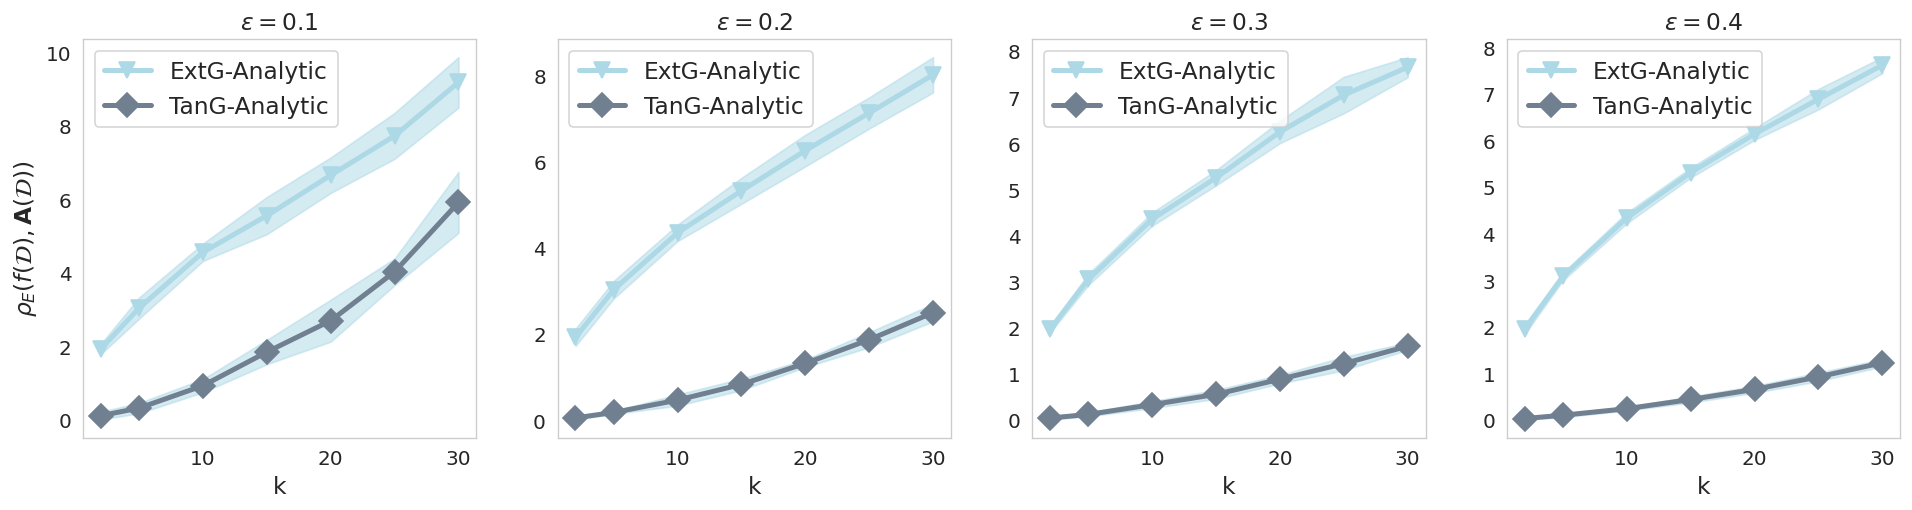

In [47]:
import seaborn as sns

sns.set_style("whitegrid", {"axes.grid": False})
# sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})
fig, axes = plt.subplots(1, 4, figsize=(16, 4), dpi=120)
fig.tight_layout()  # Or equivalently,  "plt.tight_layout()"
marker = {"ext": "v", "log": "D"}
colors = {"ext": "lightblue", "log": "slategray"}
print(colors["log"])
# fig.supxlabel('Utility plots for Delta=1e-6')

axes[0].set_ylabel(r'$\rho_{E}(f(\mathcal{D}),\mathcal{\mathbf{A}}(\mathcal{D}))$', fontsize=14)

for i in range(len(eps_list)):
    eps = eps_list[i]
    np_log_data_mean = np.array(log_data_mean[i])
    np_log_data_std = np.array(log_data_std[i])


    np_ext_data_mean = np.array(ext_data_mean[i])
    np_ext_data_std = np.array(ext_data_std[i])

    # print(np_log_data_mean)
    # print(np_log_data_std)
    # print(np_ext_data_mean)
    # print(np_ext_data_std)
    # #print("laplace_std", laplace_mean - 2 * laplace_std)
    # print("upper classical_gaussian_std", log_classical_gaussian_data_mean + 2 * log_classical_gaussian_data_mean)
    # print("lower classical_gaussian_std", log_classical_gaussian_data_mean - 2 * log_classical_gaussian_data_mean)
    # #print("calibrated_gaussian_std", calibrated_gaussian_std )
    # print()

    axes[i].set_title(r"$\epsilon={}$".format(eps), fontsize=14)
    axes[i].plot(
        k_list,
        np_ext_data_mean,
        marker=marker["ext"],
        color=colors["ext"],
        linewidth=3.0,
        markersize=10,
        label="ExtG-Analytic",
    )
    axes[i].plot(
        k_list,
        np_log_data_mean,
        marker=marker["log"],
        color=colors["log"],
        linewidth=3.0,
        markersize=10,
        label="TanG-Analytic",
    )

    axes[i].fill_between(
        k_list,
        np_ext_data_mean - 2 * np_ext_data_std,
        np_ext_data_mean + 2 * np_ext_data_std,
        alpha=0.5,
        color=colors["ext"]
    
        

    )
    axes[i].fill_between(
        k_list,
        np_log_data_mean - 2 * np_log_data_std,
        np_log_data_mean + 2 * np_log_data_std,
        alpha=0.5,
        color=colors["ext"]

    )

    axes[i].set_xlabel(r"k",fontsize=14)
    axes[i].legend(loc="upper left", fontsize=14)

fig.savefig("ext_tang.pdf", bbox_inches="tight")  # save the figure to file
